In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ml_library import NeuralNetwork , z_score_normalization , train_test_split , one_hot_encode

In [2]:
df = pd.read_csv('./dataset/train_nn.csv')
df_test = pd.read_csv('./dataset/test_nn.csv')

df.shape , df_test.shape

((16000, 23), (4000, 21))

In [3]:
df.columns

Index(['Unnamed: 0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8',
       'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17',
       'F_18', 'F_19', 'F_20', 'target_cls', 'target_reg'],
      dtype='object')

In [4]:
df_test.columns

Index(['Unnamed: 0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8',
       'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17',
       'F_18', 'F_19', 'F_20'],
      dtype='object')

In [5]:
df.sample(5)

,Unnamed: 0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,target_cls,target_reg
5043,5043,4,7,6,9,7,9,10,7,4,...,5,11,6,3,18.84,5.00,4.69,73.5,25,10.02
15503,15503,3,7,4,5,1,6,7,7,9,...,1,8,4,9,12.56,11.25,4.69,73.5,3,6.72
11733,11733,5,9,6,4,4,6,4,2,2,...,7,3,1,9,18.84,2.50,6.03,23.1,13,5.96
11653,11653,6,9,8,8,7,7,7,2,4,...,8,7,4,8,25.12,5.00,6.03,23.1,1,9.95
12239,12239,8,13,6,8,3,7,7,5,5,...,5,9,5,8,18.84,6.25,8.71,54.9,15,9.12


In [6]:
df['target_cls'].value_counts().sort_index()

target_cls
1     640
2     613
3     599
4     649
5     627
6     635
7     613
8     590
9     609
10    598
11    609
12    606
13    624
14    632
15    608
16    630
17    617
18    598
19    577
20    633
21    630
22    606
23    604
24    633
25    618
26    602
Name: count, dtype: int64

In [7]:
X = df.drop(columns=["target_cls", "target_reg", "Unnamed: 0"], axis=1).values
y = df["target_cls"].values

y_onehot = one_hot_encode(y)

X_test = df_test.drop("Unnamed: 0", axis=1).values
X.shape, y.shape

((16000, 20), (16000,))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2)
X_train = z_score_normalization(X_train)
X_val = z_score_normalization(X_val)
X_test = z_score_normalization(X_test)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12800, 20), (3200, 20), (12800, 27), (3200, 27))

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(12800, 27))

In [10]:
X_test.shape

(4000, 20)

In [11]:
num_of_class = len(np.unique(y))

In [12]:
nn = NeuralNetwork(
    learning_rate=0.01,
    epochs=2000,
    loss_function="categorical_cross_entropy",
    initialization="he",
    optimizer="adam",
)

model = nn.Sequential(
    nn.Dense(100, activation="relu"),
    nn.Dense(50, activation="relu"),
    nn.Dense(27, activation="softmax"),  # num_classes
)

nn.fit(X_train, y_train, model)

Epoch 0: Loss 3.8210374359099135
Epoch 200: Loss 0.04622772223171639
Epoch 400: Loss 0.007435257958922342
Epoch 600: Loss 0.0023774048195436257
Epoch 800: Loss 0.0011339800194812438
Epoch 1000: Loss 0.0006516101987012358
Epoch 1200: Loss 0.00041933205687523284
Epoch 1400: Loss 0.000290223128766878
Epoch 1600: Loss 0.00021091786698985412
Epoch 1800: Loss 0.00015881168427912384


{'layers': ({'units': 100, 'activation': 'relu'},
  {'units': 50, 'activation': 'relu'},
  {'units': 27, 'activation': 'softmax'}),
 'parameters': {'w1': array([[-1.07185104, -0.57380572,  0.51027673, ..., -0.05595962,
          -0.0992894 ,  0.88858554],
         [-0.66529119, -0.47085674, -0.63332933, ...,  0.31251056,
           0.04977302,  0.76789283],
         [ 0.48287551, -0.80234587, -0.65253117, ..., -0.16325592,
          -0.04715142, -0.11881579],
         ...,
         [ 0.12680743,  0.50238839,  0.04653362, ...,  0.29921171,
           0.46709738, -1.0675438 ],
         [-0.20648954, -0.10983736, -0.24775841, ..., -0.35909357,
           0.29392229,  0.72512617],
         [ 0.13043544, -0.09934103, -1.15307328, ...,  0.08453041,
           0.90885393,  1.11070422]], shape=(20, 100)),
  'b1': array([[ 1.28063963,  0.4543491 ,  0.26225642,  0.23756027,  0.57751596,
           0.26666523,  0.12864492,  0.89424017,  0.02909739,  0.56206832,
          -1.15324898,  0.41057073,

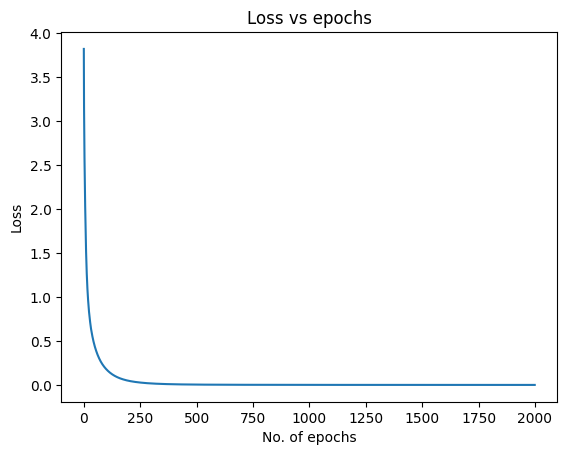

In [13]:
nn.plot_loss()

In [14]:
y_pred = nn.predict(X_val , model)
y_pred

array([[1.07817245e-61, 7.02158271e-37, 1.06158379e-84, ...,
        1.58776571e-30, 2.24084518e-17, 3.14594646e-74],
       [1.28726225e-54, 5.85074177e-56, 3.80481516e-71, ...,
        3.80137500e-55, 4.06433797e-38, 4.34004691e-55],
       [3.75822925e-46, 9.99999220e-01, 3.83346769e-52, ...,
        6.23830446e-17, 2.74546404e-26, 8.47747696e-31],
       ...,
       [8.07078513e-36, 5.31180018e-35, 4.78813762e-28, ...,
        3.84676614e-14, 1.33928650e-27, 4.62873924e-37],
       [5.37010897e-55, 5.20884877e-49, 1.94493576e-69, ...,
        2.21379531e-58, 1.40289963e-54, 1.22680425e-39],
       [1.67817465e-43, 5.03299964e-43, 6.56045356e-51, ...,
        6.41936086e-44, 2.37593316e-11, 5.31480054e-45]], shape=(3200, 27))

In [15]:
y_pred_class = np.argmax(y_pred, axis=1)  # convert softmax → class label
y_true_class = np.argmax(y_val, axis=1)

In [16]:
y_pred_class

array([22, 16,  1, ...,  8,  3,  6], shape=(3200,))

In [17]:
y_true_class

array([22, 16,  1, ...,  8,  3,  6], shape=(3200,))

In [19]:
nn.evaluation_metrics(y_true_class, y_pred_class)

Accuracy: 0.9409375
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


(np.float64(0.9409375), np.float64(1.0), np.float64(1.0), np.float64(1.0))

In [20]:
y_test_pred = nn.predict(X_test , model)
y_test_class = np.argmax(y_test_pred, axis=1)
y_test_class

array([24, 12,  1, ..., 17, 25, 25], shape=(4000,))

In [21]:
df_test["target_cls"] = y_test_class
df_test.head()

,Unnamed: 0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,target_cls
0,0,3,6,5,6,4,6,7,3,8,...,9,3,7,7,6,15.70,10.00,4.02,32.4,24
1,1,4,11,6,8,8,7,8,3,5,...,10,6,11,7,5,18.84,6.25,7.37,33.9,12
2,2,3,4,5,3,2,10,2,2,1,...,9,2,6,2,8,15.70,1.25,2.68,21.6,1
3,3,2,4,2,3,2,7,7,5,7,...,8,2,8,5,10,6.28,8.75,2.68,52.2,5
4,4,4,5,5,7,3,8,7,8,6,...,9,3,8,5,9,15.70,7.50,3.35,83.1,17


In [22]:
df_test.to_csv('./output/submission_nn_multiclass')